In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [2]:
df = pd.read_csv('data/heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
df.shape

(918, 12)

In [4]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [5]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

<AxesSubplot:xlabel='MaxHR', ylabel='Count'>

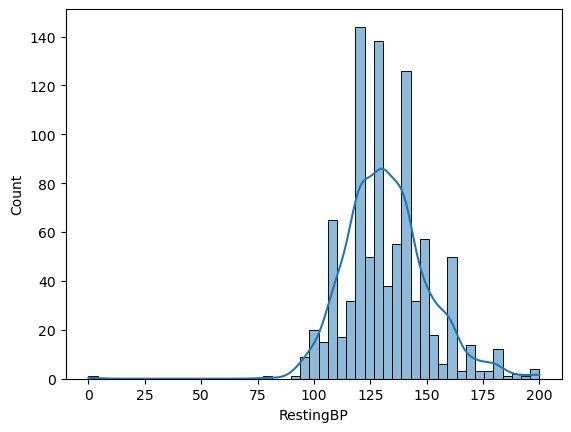

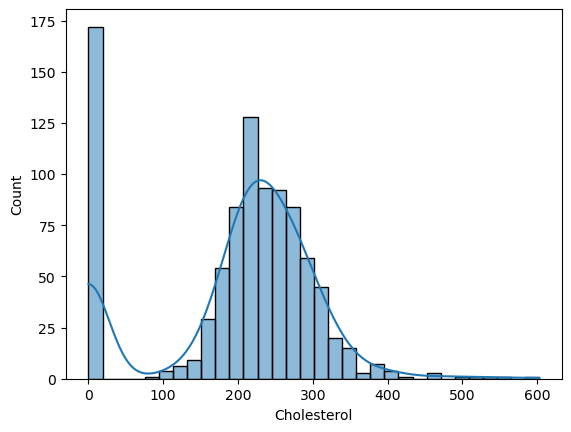

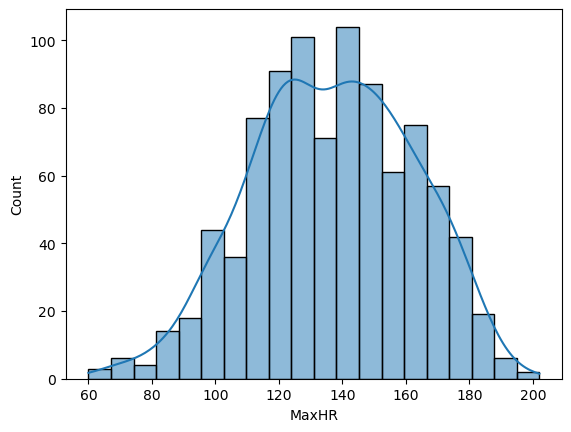

In [6]:
sns.histplot(df.RestingBP, kde=True)
plt.figure()
sns.histplot(df.Cholesterol, kde=True)
plt.figure()
sns.histplot(df.MaxHR, kde=True)

### Z Score

In [7]:
df['Cholesterol'] = df['Cholesterol'].replace(0, df['Cholesterol'].median())

In [8]:
columns = ['RestingBP', 'Cholesterol', 'MaxHR']
for x in columns:
    df['zscore_' + x] = (df[x] - df[x].mean()) / df[x].std()

In [9]:
outliers = []
for x in columns:
    outliers.append(df.loc[(df['zscore_' + x] > 3) | (df['zscore_' + x] < -3)])
    
outliers = pd.concat(outliers)
outliers.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,zscore_RestingBP,zscore_Cholesterol,zscore_MaxHR
109,39,M,ATA,190,241,0,Normal,106,N,0.0,Up,0,3.111322,0.007749,-1.210093
241,54,M,ASY,200,198,0,Normal,142,Y,2.0,Flat,1,3.651449,-0.788799,0.203871
365,64,F,ASY,200,223,0,Normal,140,Y,1.0,Flat,1,3.651449,-0.325690,0.125318
399,61,M,NAP,200,223,1,ST,70,N,0.0,Flat,1,3.651449,-0.325690,-2.624057
449,55,M,NAP,0,223,0,Normal,155,N,1.5,Flat,1,-7.151097,-0.325690,0.714469


In [10]:
df.drop(outliers.index, inplace=True)
df.shape

(896, 15)

<AxesSubplot:xlabel='MaxHR', ylabel='Count'>

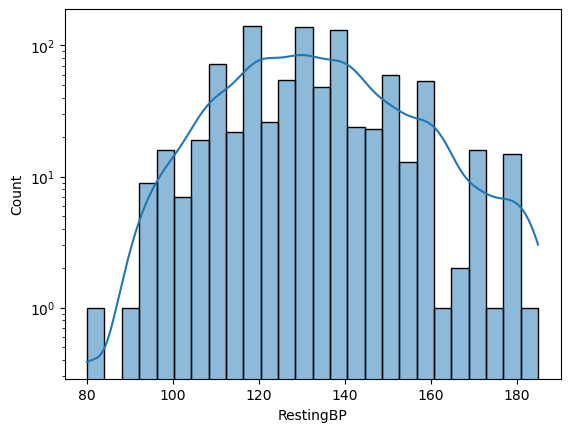

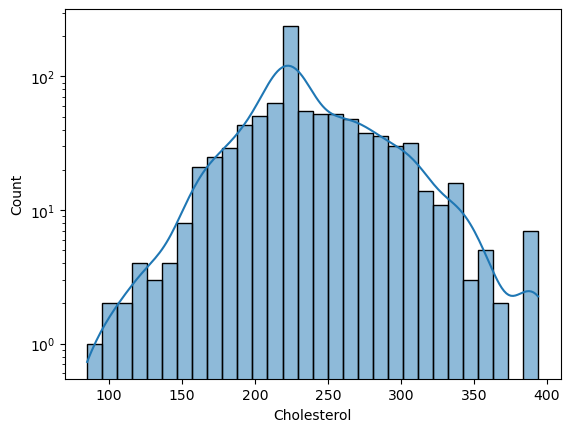

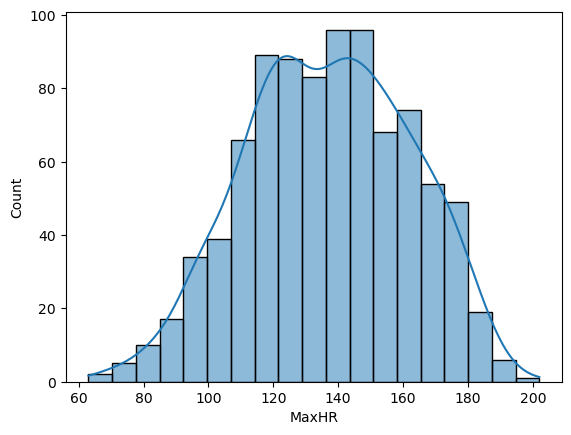

In [11]:
sns.histplot(df.RestingBP, kde=True).set(yscale="log")
plt.figure()
sns.histplot(df.Cholesterol, kde=True).set(yscale="log")
plt.figure()
sns.histplot(df.MaxHR, kde=True)

### Label encoder

In [12]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_le = df.copy().drop(['zscore_RestingBP', 'zscore_Cholesterol', 'zscore_MaxHR'], axis=1)
df_le[['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']] = df_le[['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']].apply(le.fit_transform)
df_le.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


### Hot Encoding - Dummies 

In [13]:
df_hot = df.copy().drop(['zscore_RestingBP', 'zscore_Cholesterol', 'zscore_MaxHR'], axis=1)
df_hot = pd.get_dummies(df_hot)
df_hot.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,1,0,0,...,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,1
3,48,138,214,0,108,1.5,1,1,0,1,...,0,0,0,1,0,0,1,0,1,0
4,54,150,195,0,122,0.0,0,0,1,0,...,1,0,0,1,0,1,0,0,0,1


### Scaling

In [14]:
X_le = df_le.drop(['HeartDisease'], axis=1)
y_le = df_le['HeartDisease']

X_hot = df_hot.drop(['HeartDisease'], axis=1)
y_hot = df_hot['HeartDisease']

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_le_scaled = scaler.fit_transform(X_le)
X_hot_scaled = scaler.fit_transform(X_hot)

### Cross valitation and Hyper parameter tunning

In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [17]:
models = {
    'svm': {
        'model': SVC(gamma='auto'),
        'params': {
            'C': [1,10,20],
            'kernel': ['rbf', 'linear']
        }
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [5,15,30]
        }
    },
    'logistic_regression': {
        'model': LogisticRegression(solver='liblinear', multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    }
    
}

In [18]:
def cv_models(models, x, y):
    scores = []

    for model, mp in models.items():
        clf = GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
        clf.fit(x, y)
        scores.append({
            'model': model,
            'best_score': clf.best_score_,
            'best_params':clf.best_params_
        })
    return scores

In [19]:
best_le = pd.DataFrame(cv_models(models, X_le_scaled, y_le))
best_le

,model,best_score,best_params
0,svm,0.820267,"{'C': 1, 'kernel': 'rbf'}"
1,random_forest,0.828082,{'n_estimators': 30}
2,logistic_regression,0.819181,{'C': 1}


In [20]:
best_hot= pd.DataFrame(cv_models(models, X_hot_scaled, y_le))
best_hot

,model,best_score,best_params
0,svm,0.841459,"{'C': 1, 'kernel': 'linear'}"
1,random_forest,0.826934,{'n_estimators': 30}
2,logistic_regression,0.844823,{'C': 10}


### Models PCA

In [21]:
from sklearn.decomposition import PCA

pca = PCA(0.95)
X_pca_le = pca.fit_transform(X_le_scaled)
X_pca_hot= pca.fit_transform(X_hot_scaled)

In [22]:
best_pca_le = pd.DataFrame(cv_models(models, X_pca_le, y_le))
best_pca_le 

,model,best_score,best_params
0,svm,0.833675,"{'C': 1, 'kernel': 'linear'}"
1,random_forest,0.812471,{'n_estimators': 30}
2,logistic_regression,0.820298,{'C': 1}


In [23]:
best_pca_hot = pd.DataFrame(cv_models(models, X_pca_hot, y_le))
best_pca_hot 

,model,best_score,best_params
0,svm,0.835872,"{'C': 1, 'kernel': 'linear'}"
1,random_forest,0.814662,{'n_estimators': 30}
2,logistic_regression,0.839236,{'C': 1}


### Applying exact number of components

In [24]:
pca = PCA(n_components=3)
X_pca_le = pca.fit_transform(X_le_scaled)
X_pca_hot = pca.fit_transform(X_hot_scaled)

In [25]:
best_pca_le = pd.DataFrame(cv_models(models, X_pca_le, y_le))
best_pca_le 

,model,best_score,best_params
0,svm,0.818045,"{'C': 10, 'kernel': 'rbf'}"
1,random_forest,0.808032,{'n_estimators': 30}
2,logistic_regression,0.822539,{'C': 1}


In [26]:
best_pca_hot = pd.DataFrame(cv_models(models, X_pca_hot, y_le))
best_pca_hot 

,model,best_score,best_params
0,svm,0.840348,"{'C': 1, 'kernel': 'linear'}"
1,random_forest,0.807976,{'n_estimators': 30}
2,logistic_regression,0.842595,{'C': 1}
